In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

FileNotFoundError: ignored

# New section

In [ ]:
df.describe

<bound method NDFrame.describe of       age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


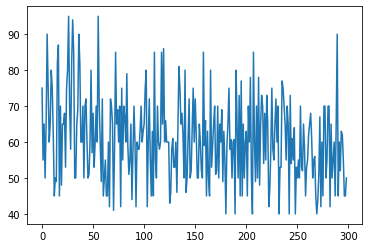

In [ ]:
plt.plot(df.age)

In [ ]:


X =df.iloc[:,:-1]
y =df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.8)




In [ ]:
forest = RandomForestClassifier(random_state=0)
forest = forest.fit(X_train, y_train)


In [ ]:
#classify2= RandomForestClassifier(n_estimators=300,random_state=0)

# Creation of model
#classify2=classify2.fit(X_train, y_train) # Training this model


In [ ]:
classify1= RandomForestClassifier(n_estimators=400,random_state=0)

# Creation of model
classify1=classify1.fit(X_train, y_train) # Training this model

In [ ]:
classify2= RandomForestClassifier(n_estimators=1,random_state=0)

# Creation of model
classify2=classify2.fit(X_train, y_train) # Training this model

In [ ]:
# Predictions of this model
predictions1=classify1.predict(X_test)
predictions2=classify2.predict(X_test)
predictions3=classify3.predict(X_test)
#predictions1=forest.predict(X_test)

In [ ]:
print('Random Forest Classifier',classify1.score(X_test, y_test))
print('Random Forest Classifier',classify2.score(X_test, y_test))
print('Random Forest Classifier',classify3.score(X_test, y_test))
#print('Random Forest Classifier',forest.score(X_test, y_test))

Random Forest Classifier 0.8333333333333334
Random Forest Classifier 0.85
Random Forest Classifier 0.8333333333333334


In [ ]:
print(classification_report(y_test,predictions2 ))
print(classification_report(y_test,predictions1 ))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.75      0.79      0.77        19

    accuracy                           0.85        60
   macro avg       0.82      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



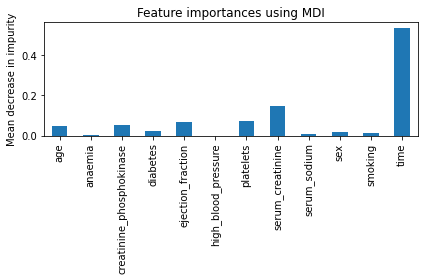

In [ ]:
importances = classify2.feature_importances_
std = np.std([tree.feature_importances_ for tree in classify2.estimators_], axis=0)

importances = classify2.feature_importances_
classify2_importances = pd.Series(importances, index=df.columns[:-1])

fig, ax = plt.subplots()
classify2_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
df.ejection_fraction
df.serum_creatinine

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 299, dtype: float64

(array([218.,  53.,  14.,   7.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([0.5 , 1.39, 2.28, 3.17, 4.06, 4.95, 5.84, 6.73, 7.62, 8.51, 9.4 ]),
 <a list of 10 Patch objects>)

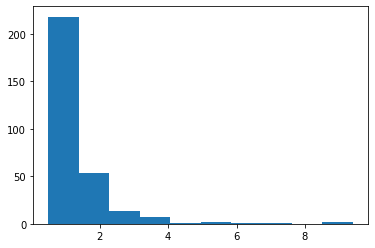

In [ ]:
plt.hist(df.serum_creatinine)

(array([ 23.,  36.,  34., 126.,  20.,  21.,  34.,   3.,   1.,   1.]),
 array([14. , 20.6, 27.2, 33.8, 40.4, 47. , 53.6, 60.2, 66.8, 73.4, 80. ]),
 <a list of 10 Patch objects>)

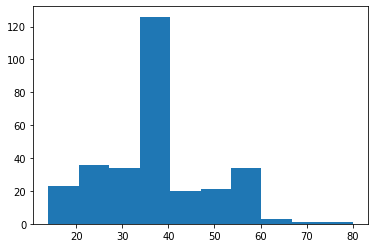

In [ ]:
plt.hist(df.ejection_fractionbb)

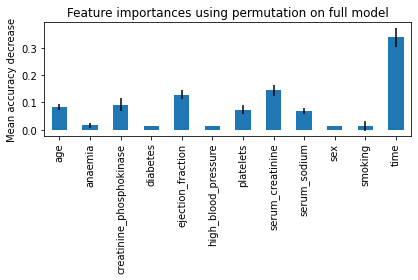

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    classify2, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

classify2_importances2 = pd.Series(result.importances_mean, index=df.columns[:-1])

fig, ax = plt.subplots()
classify2b_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


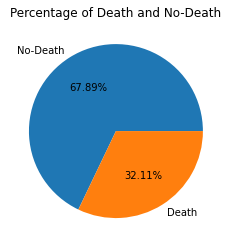

In [ ]:
#plot pie chart of diagnosis
diag_counts = df['DEATH_EVENT'].value_counts()
labels = 'No-Death','Death'
plt.pie(diag_counts,autopct ='%1.2f%%',labels=labels)
plt.title('Percentage of Death and No-Death')
plt.show()
